<a href="https://colab.research.google.com/github/DikshitaNikam/Deep-Learning/blob/main/multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Classification




In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 - Data Ingestion

In [6]:

url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv"
print(url1)


https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/train_weather.csv


In [ ]:
import pandas as pd

In [8]:
df = pd.read_csv(url1)
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


### Target Feature- Wether Type

In [9]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [10]:
df["Weather Type"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [11]:
df["Weather Type"].value_counts()


,count
Weather Type,
Rainy,3300
Cloudy,3300
Sunny,3300
Snowy,3300


<Axes: xlabel='Weather Type'>

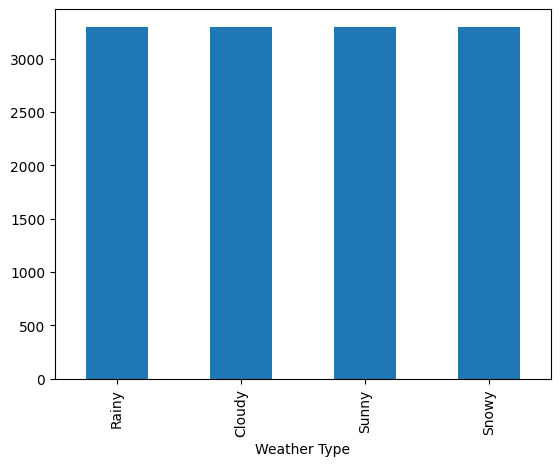

In [12]:
df["Weather Type"].value_counts().plot(kind="bar")

## Step 2 - Perform Basic Data Quality checks

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [14]:
df.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),0
Cloud Cover,0
Atmospheric Pressure,0
UV Index,0
Season,0
Visibility (km),0
Location,0


In [15]:
df.duplicated().sum()

np.int64(0)

### Step 3 - Separate X and Y (Weather Type)

In [16]:
X = df.drop(columns= ["Weather Type"])
Y = df[["Weather Type"]]

In [17]:
X.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain


In [18]:
Y.head()

,Weather Type
0,Rainy
1,Cloudy
2,Sunny
3,Sunny
4,Rainy


### Step 4 - Preprocess X and Y

In [19]:
X.dtypes

,0
Temperature,float64
Humidity,int64
Wind Speed,float64
Precipitation (%),float64
Cloud Cover,object
Atmospheric Pressure,float64
UV Index,int64
Season,object
Visibility (km),float64
Location,object


In [20]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [21]:
cat

['Cloud Cover', 'Season', 'Location']

In [22]:
con

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [24]:
num_pipe = make_pipeline(
    SimpleImputer(strategy= "median"),
    StandardScaler()
)


In [26]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)


In [29]:
pre = ColumnTransformer(
[
    ("num", num_pipe, con),
    ("ca", cat_pipe, cat)
]

).set_output(transform="pandas")

In [30]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),ca__Cloud Cover_cloudy,ca__Cloud Cover_overcast,ca__Cloud Cover_partly cloudy,ca__Season_Spring,ca__Season_Summer,ca__Season_Winter,ca__Location_inland,ca__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


### Only in multiclass classification problem you need to one hotencode target feature

In [31]:
Y_pre = pd.get_dummies(Y, dtype=int)
Y_pre.head()

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0


In [32]:
Y_pre.columns

Index(['Weather Type_Cloudy', 'Weather Type_Rainy', 'Weather Type_Snowy',
       'Weather Type_Sunny'],
      dtype='object')

In [33]:
Y_pre.columns[0].split("_")[-1]

'Cloudy'

In [34]:
classes = [col.split("_")[-1] for col in  Y_pre.columns]
classes

['Cloudy', 'Rainy', 'Snowy', 'Sunny']

## Step 5 - Train test Split

In [35]:

from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y_pre, test_size=0.2, random_state=42)


In [36]:
xtrain.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),ca__Cloud Cover_cloudy,ca__Cloud Cover_overcast,ca__Cloud Cover_partly cloudy,ca__Season_Spring,ca__Season_Summer,ca__Season_Winter,ca__Location_inland,ca__Location_mountain
3958,0.740404,-0.134243,-0.554712,1.200664,0.117804,-0.520104,-1.175461,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2239,-0.237413,1.351385,0.169040,0.105042,0.299802,-1.038715,-0.433923,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3608,0.510330,-0.530410,-0.482337,-1.334918,0.525351,1.554340,1.049153,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6848,1.603184,0.757134,5.018179,0.981540,-0.364746,-0.520104,-1.027154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6119,-0.064857,-0.134243,0.603291,-1.366221,-0.155596,-0.779410,0.752538,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
ytrain.head()

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
3958,0,1,0,0
2239,0,1,0,0
3608,0,0,0,1
6848,0,1,0,0
6119,1,0,0,0


In [38]:
xtest.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),ca__Cloud Cover_cloudy,ca__Cloud Cover_overcast,ca__Cloud Cover_partly cloudy,ca__Season_Spring,ca__Season_Summer,ca__Season_Winter,ca__Location_inland,ca__Location_mountain
4111,0.222737,-1.520829,-0.771838,-1.491435,0.412980,1.295035,1.345768,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10607,2.465964,1.252343,0.675666,0.918933,0.530728,1.554340,-0.433923,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7372,1.200553,-0.877057,-1.133714,-1.303614,0.519437,1.035729,0.752538,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
11786,-1.502823,0.509529,-0.482337,1.138057,-0.329798,-1.038715,-1.175461,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
12227,0.107699,1.252343,0.024290,1.732823,0.588257,1.813646,1.049153,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [39]:
ytest.head()

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
4111,0,0,0,1
10607,0,0,0,1
7372,0,0,0,1
11786,0,0,1,0
12227,0,0,0,1


In [40]:
xtrain.shape

(10560, 15)

In [41]:
xtest.shape

(2640, 15)

In [42]:
xtrain.shape[1]

15

In [43]:
ytrain.shape[1]

4

### Step 6 - Model Training

In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping

In [45]:
model = Sequential(
    [
        Input(shape = (xtrain.shape[1],)),
        Dense(32, activation="relu"),
        Dropout(0.5),
        Dense(16, activation="relu"),
        Dropout(0.4),
        Dense(ytrain.shape[1], activation="softmax")
    ]
)

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,108 (4.33 KB)

 Trainable params: 1,108 (4.33 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [48]:
es = EarlyStopping(patience=5, restore_best_weights=True)

In [49]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100, callbacks=[es])


Epoch 1/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4191 - loss: 1.2722 - val_accuracy: 0.8348 - val_loss: 0.7289
Epoch 2/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6548 - loss: 0.8973 - val_accuracy: 0.8674 - val_loss: 0.5244
Epoch 3/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7334 - loss: 0.7655 - val_accuracy: 0.8741 - val_loss: 0.4451
Epoch 4/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7685 - loss: 0.6468 - val_accuracy: 0.8835 - val_loss: 0.3929
Epoch 5/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7944 - loss: 0.6178 - val_accuracy: 0.8892 - val_loss: 0.3580
Epoch 6/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7989 - loss: 0.5728 - val_accuracy: 0.8944 - val_loss: 0.3264
Epoch 7/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8209 - loss: 0.5358 - val_accuracy: 0.8954 - val_loss: 0.3116
Epoch 8/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8314 - loss: 0.5161 - val_accu

## Plot the Learning curve

In [50]:
import matplotlib.pyplot as plt

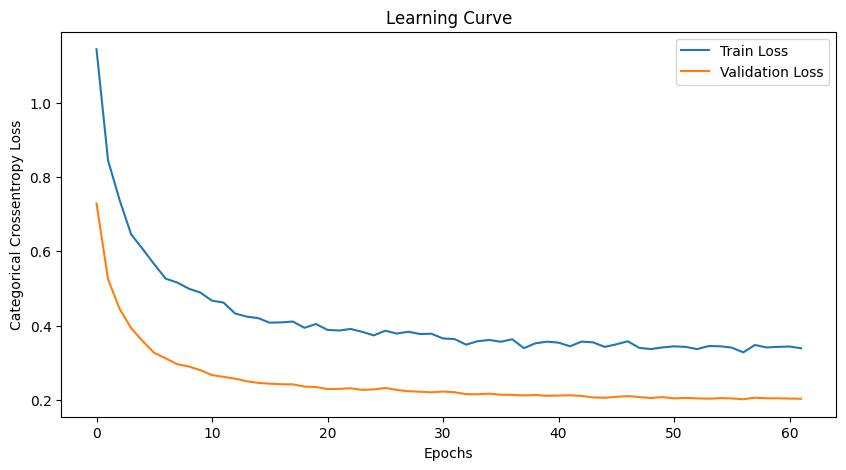

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

### Step 7 - Model evaluation

In [52]:
model.evaluate(xtrain, ytrain)

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9062 - loss: 0.2076


[0.2060980200767517, 0.9089015126228333]

In [53]:
model.evaluate(xtest, ytest)

83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8988 - loss: 0.2443


[0.24416330456733704, 0.8984848260879517]

In [54]:
yprob_train = model.predict(xtrain)
yprob_train[0:5]

330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[2.7041329e-02, 9.6718186e-01, 3.5420472e-03, 2.2347607e-03],
       [2.4830190e-02, 9.7421318e-01, 5.6767062e-04, 3.8893393e-04],
       [2.8678079e-07, 6.4743252e-13, 8.8045713e-09, 9.9999976e-01],
       [3.1665300e-03, 9.9579549e-01, 7.9367461e-04, 2.4433766e-04],
       [9.9970883e-01, 3.3874858e-05, 3.6508204e-06, 2.5358892e-04]],
      dtype=float32)

In [55]:
ypred_train_idx = yprob_train.argmax(axis=1)
ypred_train_idx[0:5]

array([1, 1, 3, 1, 0])

In [56]:
ypred_train = [classes[idx] for idx in ypred_train_idx]
ypred_train[0:5]

['Rainy', 'Rainy', 'Sunny', 'Rainy', 'Cloudy']

In [57]:
ytrain.head()

,Weather Type_Cloudy,Weather Type_Rainy,Weather Type_Snowy,Weather Type_Sunny
3958,0,1,0,0
2239,0,1,0,0
3608,0,0,0,1
6848,0,1,0,0
6119,1,0,0,0


In [58]:
ytrain_org = ytrain.idxmax(axis=1).str.replace("Weather Type_", "")
ytrain_org.head()

,0
3958,Rainy
2239,Rainy
3608,Sunny
6848,Rainy
6119,Cloudy


In [59]:
ytest_org = ytest.idxmax(axis=1).str.replace("Weather Type_", "")
ytest_org.head()

,0
4111,Sunny
10607,Sunny
7372,Sunny
11786,Snowy
12227,Sunny


In [60]:
def predict_class(model, x):
  yprob = model.predict(x)
  ypred_idx = yprob.argmax(axis=1)
  ypred = [classes[idx] for idx in ypred_idx]
  return ypred , yprob

In [61]:
ypred_test, yprob_test = predict_class(model, xtest)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [62]:
yprob_test[0:5].round(4)

array([[0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00],
       [1.000e-04, 0.000e+00, 0.000e+00, 9.999e-01],
       [2.100e-03, 0.000e+00, 1.000e-04, 9.978e-01],
       [0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00],
       [4.090e-01, 5.940e-02, 8.610e-02, 4.455e-01]], dtype=float32)

In [63]:
ypred_test[0:5]

['Sunny', 'Sunny', 'Sunny', 'Snowy', 'Sunny']

In [64]:
ytest_org.head()

,0
4111,Sunny
10607,Sunny
7372,Sunny
11786,Snowy
12227,Sunny


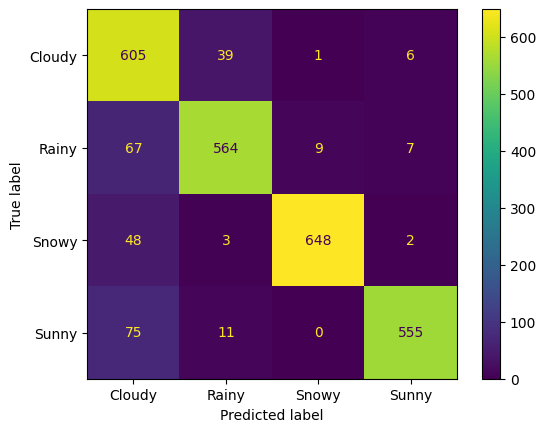

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest_org, ypred_test)

In [66]:
from sklearn.metrics import classification_report
print(classification_report(ytest_org, ypred_test))

              precision    recall  f1-score   support

      Cloudy       0.76      0.93      0.84       651
       Rainy       0.91      0.87      0.89       647
       Snowy       0.98      0.92      0.95       701
       Sunny       0.97      0.87      0.92       641

    accuracy                           0.90      2640
   macro avg       0.91      0.90      0.90      2640
weighted avg       0.91      0.90      0.90      2640



### From above metrics i can say that the model is good and can be used for  out of sample prediction

## Step 8 - Out of Sample Prediction

In [67]:

url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_weather.csv"
print(url2)


https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_weather.csv


In [68]:
xnew = pd.read_csv(url2)
xnew.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland


In [69]:
xnew.isna().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Precipitation (%),1
Cloud Cover,1
Atmospheric Pressure,0
UV Index,0
Season,2
Visibility (km),1
Location,2


In [70]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('ca',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [71]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),ca__Cloud Cover_cloudy,ca__Cloud Cover_overcast,ca__Cloud Cover_partly cloudy,ca__Season_Spring,ca__Season_Summer,ca__Season_Winter,ca__Location_inland,ca__Location_mountain
0,-1.100192,-0.035201,0.892792,0.386773,-0.561530,-1.038715,-1.027154,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5.054302,1.896115,0.748042,0.918933,0.246574,1.813646,0.455922,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-0.007338,0.360966,0.386166,-0.583634,0.307330,-0.001493,0.752538,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.165218,1.499948,1.254668,0.136346,0.184743,-1.038715,-0.582231,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.797923,-2.164601,-0.265211,-1.491435,0.482338,0.517118,-0.137308,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [72]:
preds, probs = predict_class(model, xnew_pre)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


In [73]:
preds[0:5]

['Snowy', 'Sunny', 'Cloudy', 'Rainy', 'Sunny']

In [74]:
probs[0:5].round(4)

array([[0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00],
       [3.200e-03, 0.000e+00, 4.000e-04, 9.963e-01],
       [9.617e-01, 1.850e-02, 2.100e-03, 1.770e-02],
       [1.860e-02, 9.700e-01, 8.400e-03, 3.100e-03],
       [1.900e-03, 0.000e+00, 0.000e+00, 9.981e-01]], dtype=float32)

In [76]:
xnew["Weather Type"] = preds
xnew[classes] = probs.round(4)

In [77]:
xnew

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Cloudy,Rainy,Snowy,Sunny
0,0,68,16.0,66.0,overcast,984.94,0,Winter,2.0,mountain,Snowy,0.0000,0.0000,1.0000,0.0000
1,107,107,15.0,83.0,partly cloudy,1015.00,11,Summer,7.0,mountain,Sunny,0.0032,0.0000,0.0004,0.9963
2,19,76,12.5,35.0,partly cloudy,1017.26,4,Summer,8.0,inland,Cloudy,0.9617,0.0185,0.0021,0.0177
3,22,99,18.5,NaN,partly cloudy,1012.70,0,NaN,3.5,inland,Rainy,0.0186,0.9700,0.0084,0.0031
4,33,25,8.0,6.0,partly cloudy,1023.77,6,Spring,NaN,inland,Sunny,0.0019,0.0000,0.0000,0.9981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,27,59,9.5,41.0,overcast,1001.39,4,Spring,8.0,mountain,Cloudy,0.9478,0.0305,0.0026,0.0191
96,73,82,47.0,107.0,overcast,1002.73,0,Winter,0.5,mountain,Rainy,0.0010,0.9988,0.0001,0.0000
97,2,60,3.0,70.0,overcast,994.19,0,Winter,2.0,mountain,Snowy,0.0000,0.0000,1.0000,0.0000
98,33,44,1.5,11.0,clear,1011.95,7,Summer,8.5,inland,Sunny,0.0000,0.0000,0.0000,1.0000


In [78]:
xnew["Weather Type"].value_counts()

,count
Weather Type,
Cloudy,30
Snowy,27
Rainy,26
Sunny,17


<Axes: xlabel='Weather Type'>

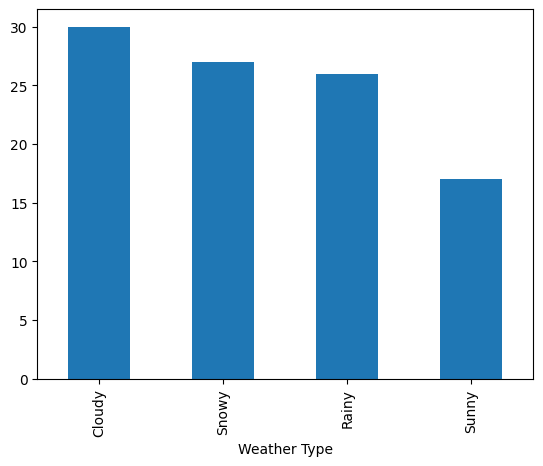

In [79]:
xnew["Weather Type"].value_counts().plot(kind="bar")

### Step 9 -  save the model and preprocessor

In [80]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('ca',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [81]:
import joblib

In [85]:
joblib.dump(pre, "weatherpre.joblib")

['weatherpre.joblib']

In [83]:
model.save("weathermodel.keras")

### Loading the pre and model form file

In [87]:
p = joblib.load("weatherpre.joblib")

In [88]:
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Temperature', 'Humidity', 'Wind Speed',
                                  'Precipitation (%)', 'Atmospheric Pressure',
                                  'UV Index', 'Visibility (km)']),
                                ('ca',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Cloud Cover', 'Season', 'Location'])])

In [89]:
from keras.models import load_model

In [92]:
m = load_model("weathermodel.keras")

In [93]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,326 (13.00 KB)

 Trainable params: 1,108 (4.33 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,218 (8.67 KB)